### Let us first import all the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

ModuleNotFoundError: No module named 'numpy'

### Let us load the dataset

In [7]:
data_url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(data_url)
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Check missing values --------------- super important
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [16]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Exploratory Data Analysis

In [17]:
# Exploratory Data Analysis !!

# First run correlation for numerical features (check both corr within idependent features and between indep & dep features)

boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


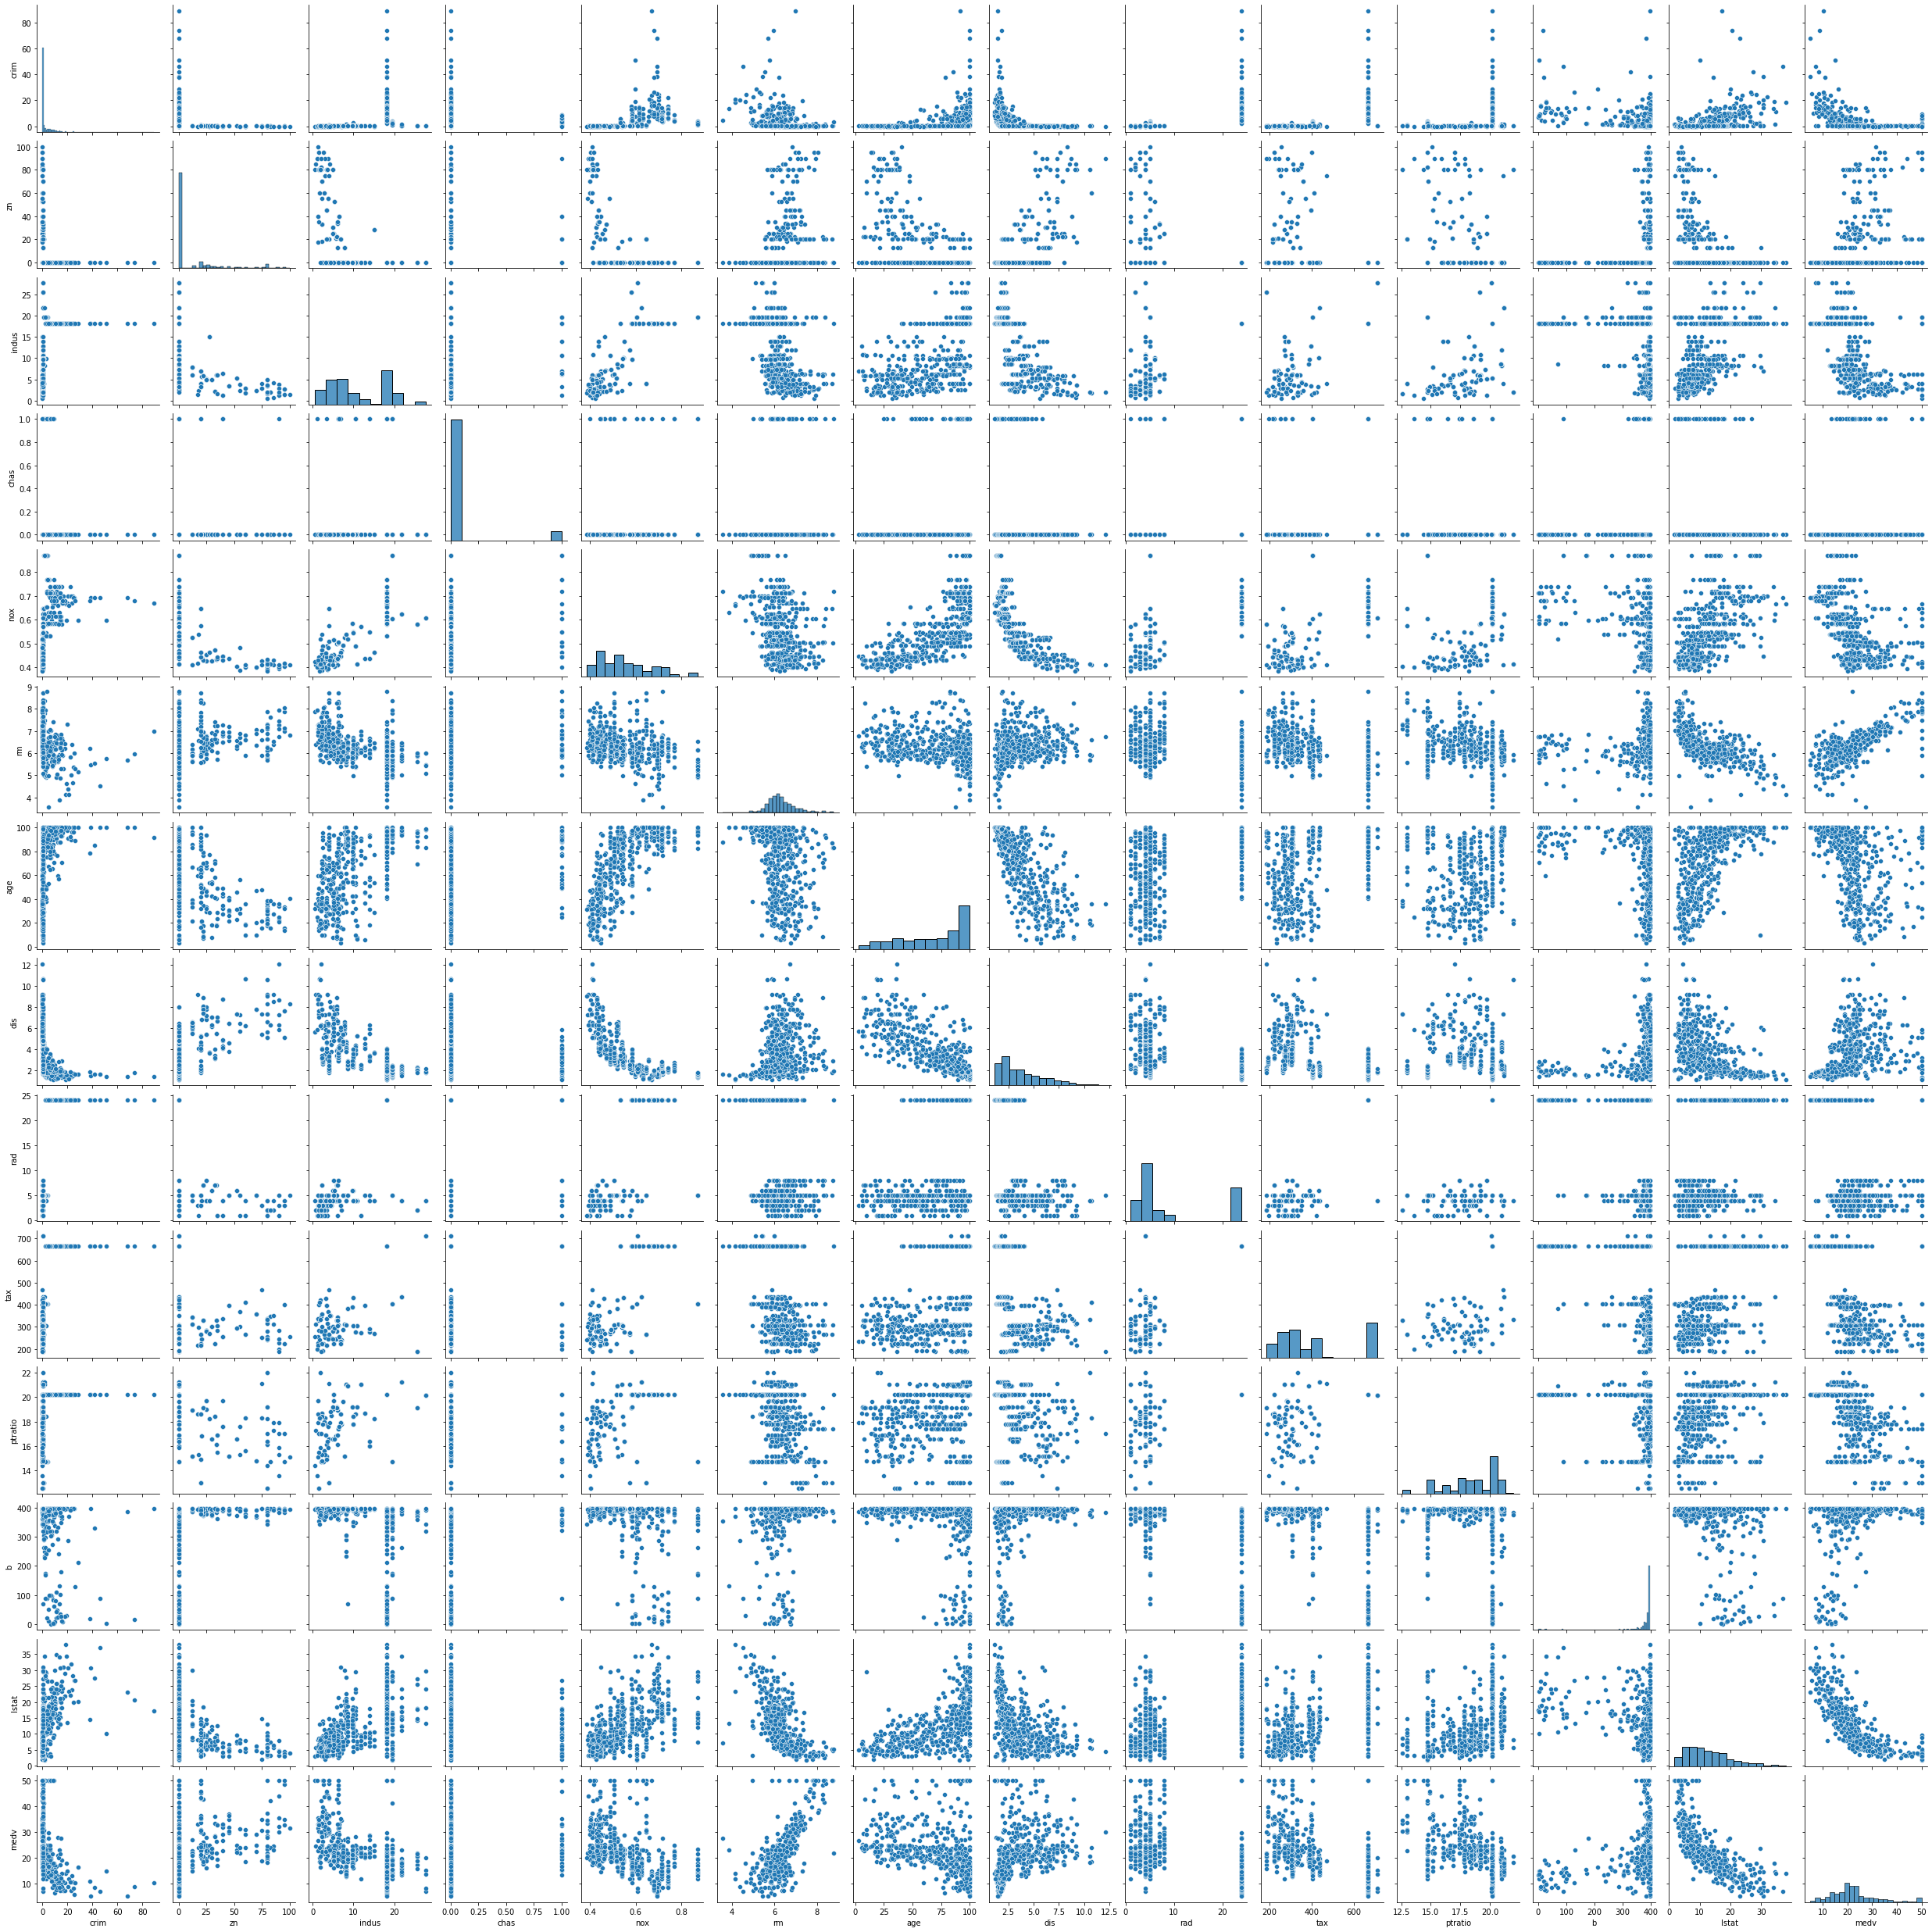

In [19]:
sns.pairplot(boston)

#### Analyzing correlated features

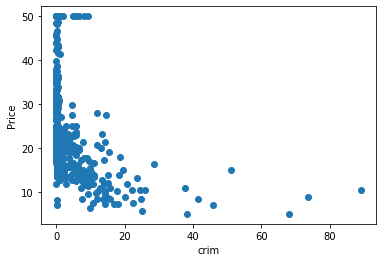

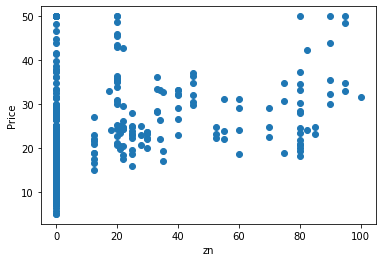

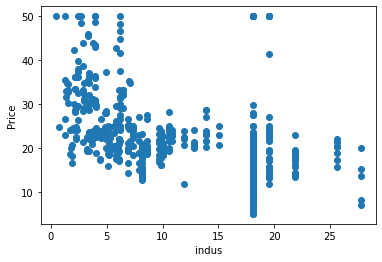

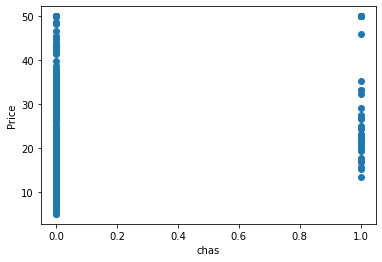

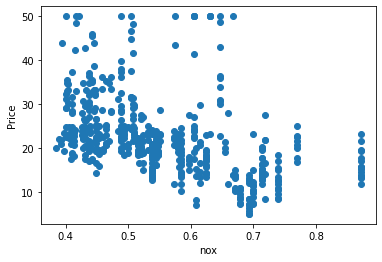

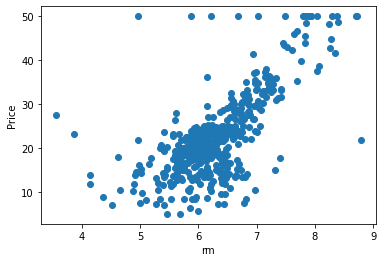

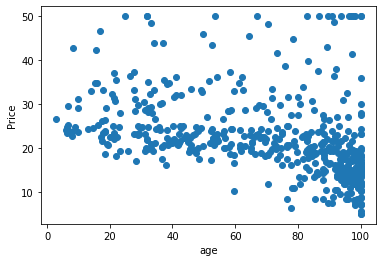

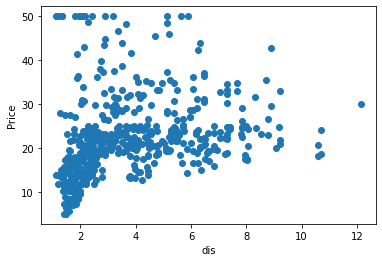

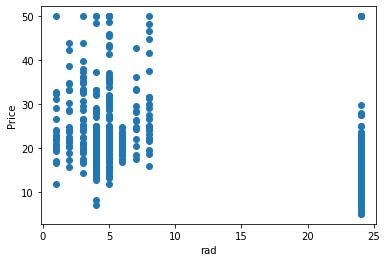

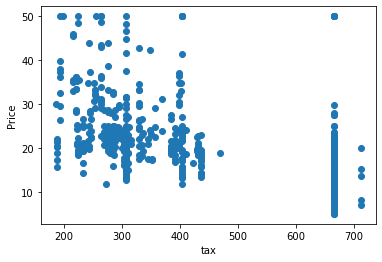

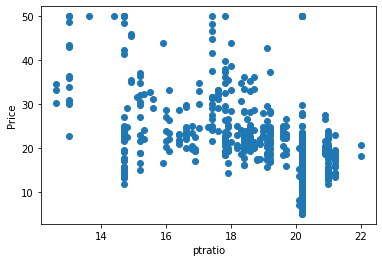

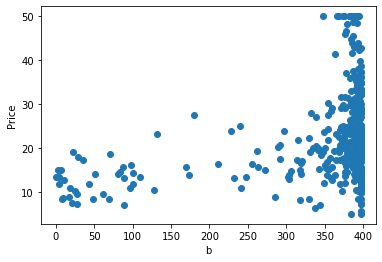

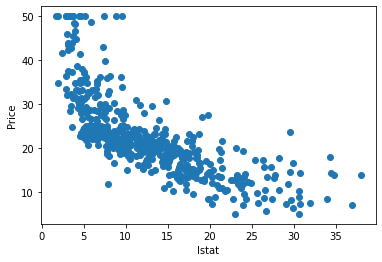

In [23]:
# View correlation between each independent feature vs the target feature
for feature in boston.columns[:-1]:

    plt.scatter(boston[feature], boston['medv'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

<AxesSubplot:xlabel='rm', ylabel='medv'>

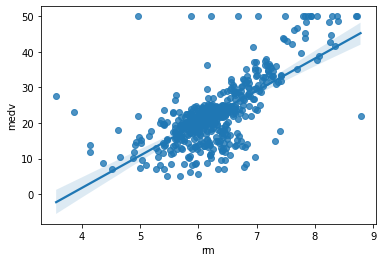

In [25]:
# Rm and Price are highly correlated. Let us explore further

sns.regplot(x='rm', y='medv', data=boston)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

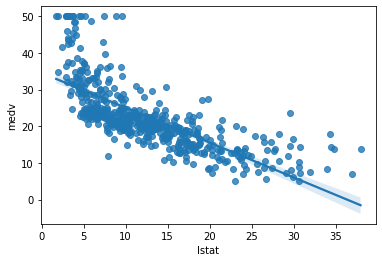

In [26]:
sns.regplot(x='lstat', y='medv', data=boston)

<AxesSubplot:xlabel='chas', ylabel='medv'>

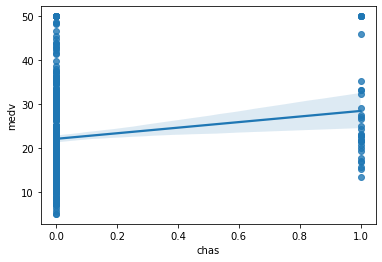

In [27]:
# Check for linearity
sns.regplot(x='chas', y='medv', data=boston)

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

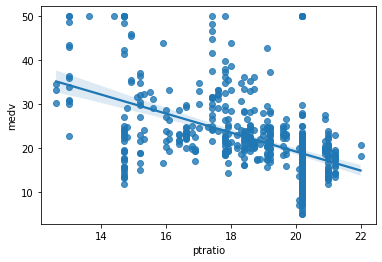

In [28]:
sns.regplot(x='ptratio', y='medv', data=boston)

### Model Creation

In [32]:
# Divide independent and dependent features

X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [33]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [34]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [35]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [37]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27


In [ ]:
# Standard Scaling

'''
As we know that we will come up with a need to minimize the error using gradient descent, one most important thing that
we need to remember is to standardize the data in order to convert the gradient descent to the global minima.
'''

In [39]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Export the pickle file for scaling

import pickle
pickle.dump(open('scaling.pkl', 'wb'))

### Model Training & Prediction

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Let us see the coefficients of the model

print(model.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [43]:
# Let us see the intercept of the model

print(model.intercept_)

23.01581920903955


In [45]:
# On which parameters the model has been trained

model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [47]:
# Prediction using Test Data

y_pred = model.predict(X_test)
y_pred[:5]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988])

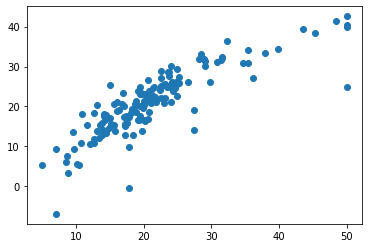

In [49]:
# Let us plot a scatter for the prediction

plt.scatter(y_test, y_pred)

In [58]:
# Residuals

residuals = y_test - y_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: medv, Length: 152, dtype: float64

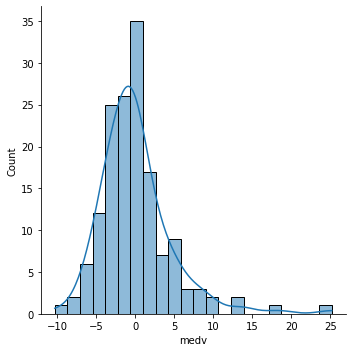

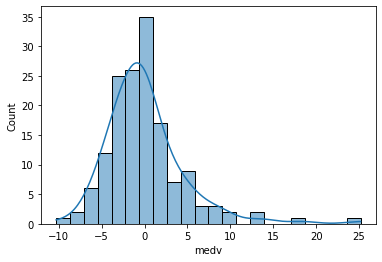

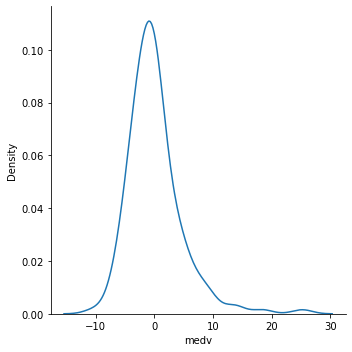

In [59]:
# Plot residuals

sns.displot(residuals, kde=True)
plt.show()
sns.histplot(residuals, kde=True)
plt.show()
sns.displot(residuals, kind='kde')
plt.show()

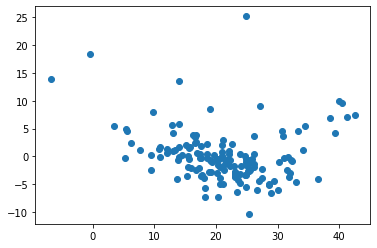

In [60]:
# Scatter plot with respect to preditction & the residuals

plt.scatter(y_pred, residuals)

### Performance Metrics

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error : 21.51744423117719
Mean Absolute Error : 21.51744423117719
Root Mean Squared Error : 4.638689926172819


In [ ]:
# R-Square and Adjusted R-Square

'''
R Square = Coefficient of Determination = 1 - SSR/SST
SSR - Sum of Squared Residuals
SST - Sum of Squared totals
'''

In [63]:
from sklearn.metrics import r2_score

In [64]:
score = r2_score(y_test, y_pred)
score

0.7112260057484935

In [66]:
adj_r2_score = 1 - (1 - score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)
adj_r2_score

0.6840226584639313

### New data prediction

In [68]:
new_data = np.array([[6.32, 1.8, 2.31, 0.00, 5.38, 6.575, 6.52, 4.09, 1.00, 2.96, 1.53, 3.969, 4.98]])

In [69]:
new_data_sc = scaler.transform(new_data)
model.predict(new_data)

E:\Installations\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-6.85704719])

In [71]:
new_data_sc

array([[ 0.34321853, -0.42539607, -1.27338003, -0.28154625, 41.35189694,
         0.34715902, -2.25436682,  0.15267164, -0.97798895, -2.43003175,
        -7.4316421 , -4.09821371, -1.04769976]])

In [70]:
model.predict(new_data_sc)

array([-34.89477408])

### Piclkling Model file for Deployment

In [72]:
import pickle

In [73]:
# Export/Save model as a pickle file

pickle.dump(model, open('linRegModel.pkl', 'wb'))

In [74]:
# load a pickle file

pickled_model = pickle.load(open('linRegModel.pkl', 'rb'))

In [75]:
pickled_model.predict(new_data_sc)

array([-34.89477408])